# Problem 1

In [43]:
%matplotlib inline
import numpy as np
import networkx as nx
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

## The Adjacency Matrix

In [21]:
A_directed = np.array( [[0, 1, 0, 0, 1],
                        [0, 0, 1, 0, 0],
                        [1, 0, 0, 1, 1],
                        [0, 1, 1, 0, 0],
                        [0, 0, 0, 0, 0]] )
print(A_directed)

[[0 1 0 0 1]
 [0 0 1 0 0]
 [1 0 0 1 1]
 [0 1 1 0 0]
 [0 0 0 0 0]]


A little visualization, just to double check.

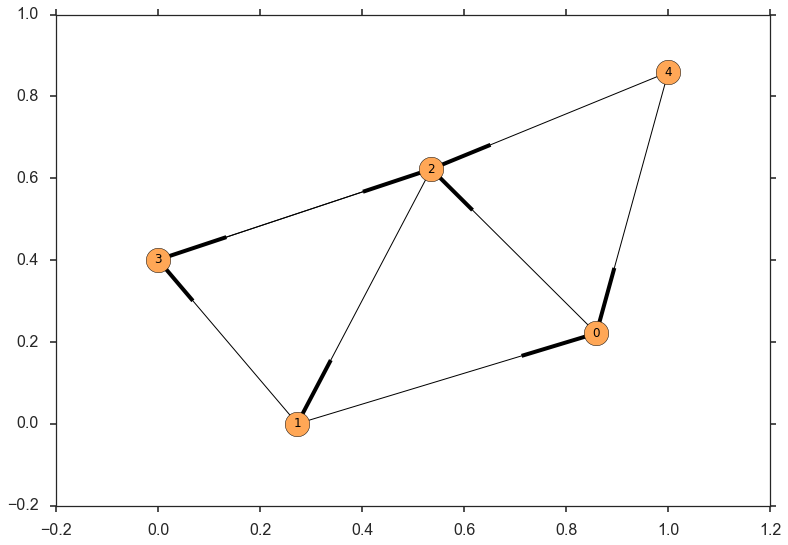

In [36]:
nx.draw_networkx(nx.DiGraph(data=A_directed.T), 
                 node_size=600, 
                 node_color=sns.xkcd_rgb["pale orange"])

## Steady-State Probability of Random Walker

We can calculate the steady state probabilities quite simply by dividing out the column sums of the adjacency matrix $A$ to convert it into a state transition matrix $M$ and then computing the matrix power $M^i$. With $i$ as a reasonably high number, the result will converge to the steady state probabilities.

In [5]:
def calc_steady_state(A, i=100):
    M = A / A.sum(axis=0)
    M = np.linalg.matrix_power(M, i)
    return M

In [40]:
def print_probs(probs):
    print('\n'.join('Node {0}: {1:.4f}'.format(node, p) for node, p in \
                zip(range(1, len(probs)+1), probs)))

The resulting probabilities:

In [41]:
probs = calc_steady_state(A_directed)[:,0]
print_probs(probs)

Node 1: 0.1000
Node 2: 0.2000
Node 3: 0.4000
Node 4: 0.3000
Node 5: 0.0000


## Steady-State Probabilities for Undirected Graph

For the undirected variant, we just mirror across the diagnol.

In [15]:
A_undirected = np.array( [[0, 1, 1, 0, 1],
                          [1, 0, 1, 1, 0],
                          [1, 1, 0, 1, 1],
                          [0, 1, 1, 0, 0],
                          [1, 0, 1, 0, 0]] )
print(A_undirected)

[[0 1 1 0 1]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 1 1 0 0]
 [1 0 1 0 0]]


In [42]:
probs = calc_steady_state(A_undirected)[:,0]
print_probs(probs)

Node 1: 0.2143
Node 2: 0.2143
Node 3: 0.2857
Node 4: 0.1429
Node 5: 0.1429


# Problem 2

## Rate Equations

$k > m$: $n_{k,t+1} = n_{k,t} + \frac{1}{t}n_{k-1,t} - \frac{1}{t}n_{k,t}$

$k = m$: $n_{m,t+1} = n_{m,t} + 1 - \frac{1}{t}n_{m,t}$

## Probabilistic Treatment

$k > m$: $(t+1)P_{k,t+1} = tP_{k,t} + \frac{1}{t}tP_{k-1,t} - \frac{1}{t}tP_{k,t}$

$\Rightarrow (t+1)P_{k,t+1} = (t-1)P_{k,t} + P_{k-1}{t}$

$k = m$: $(t+1)P_{m,t+1} = tP_{m,t} + 1 - \frac{1}{t}tP_{m,t}$

$\Rightarrow (t+1)P_{m,t+1} = (t-1)P_{m,t} + 1$

## Solving for $P_k$

$k > m$: $tP_k + P_k = tP_k - P_k + P_k - 1$

$\Rightarrow P_k = \frac{P_{k-1}}{2}$

$k = m$: $tP_m + P_m = tP_m - P_m + 1$

$\Rightarrow P_m = \frac{1}{2}$

## Final Expression

$P_k = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} \times ... \times P_m$

$\Rightarrow P_k = \frac{1}{2^k}$